# Execution clustering to risk factor dataset
## Workflow: to execute after 03_prepare_dataset_risk_factors

In [7]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Carregamento dos dados

In [8]:
filename = 'data/df_pca_risk_factors.csv'
df_dataset = pd.read_csv(filename, index_col=0)

## Parâmetros gerais

In [9]:
total_executions = 100
k_min = 2
k_max = 10

In [10]:
def plot_clusters(df_X, Y):
    sns.set(font_scale=1)
    palette = 'Paired'
    labels, index = np.unique(Y, return_inverse=True)
    grafico = plt.scatter(x=df_X.componente_principal_1, y=df_X.componente_principal_2, cmap=palette, c=index)
    plt.legend(grafico.legend_elements()[0], labels, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('Principal component  1')
    plt.ylabel('Principal component 2')
    plt.show()

## Gaussian mixture (EM algorithm) spherical covariance

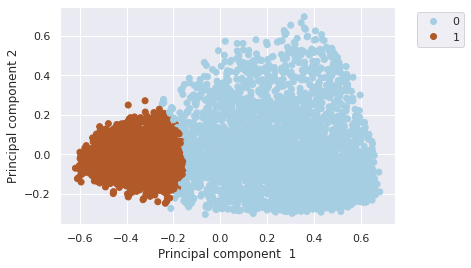

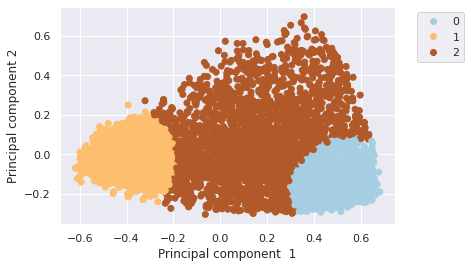

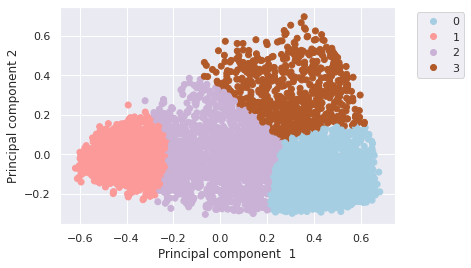

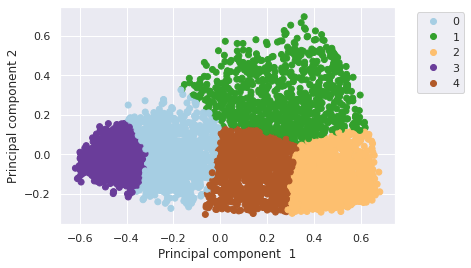

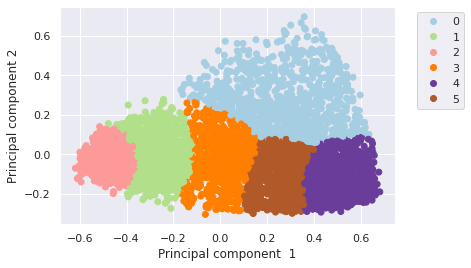

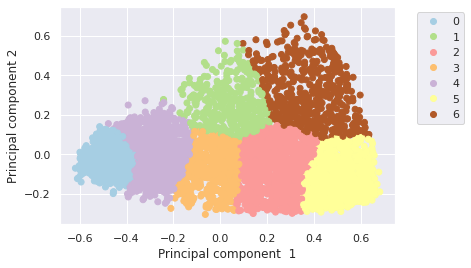

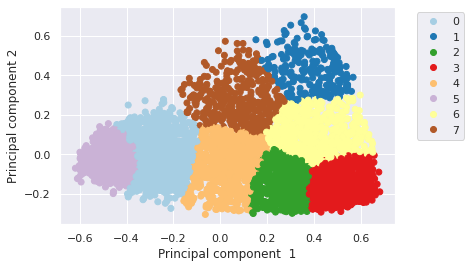

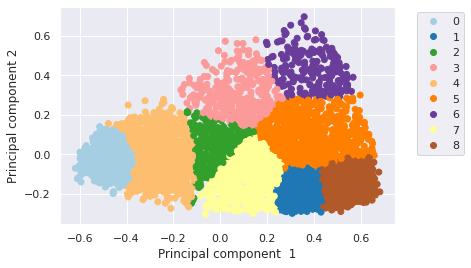

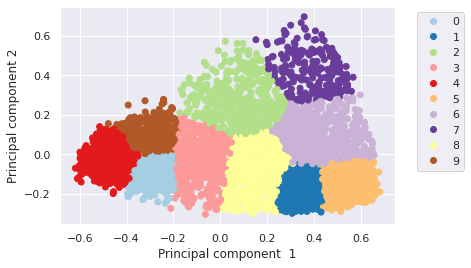

In [11]:
em_spherical = {}
for k in range(k_min, k_max + 1):
    model = GaussianMixture(k, n_init=total_executions, covariance_type='spherical')
    Y = model.fit_predict(df_dataset)
    em_spherical[k] = Y

    df_probability_risk_factors = pd.DataFrame(model.predict_proba(df_dataset), index=df_dataset.index)
    filename = 'data/df_probability_risk_factors_k_' + str(k) + '.csv'
    df_probability_risk_factors.to_csv(filename, index=True)

    filename = 'data/em_spherical_weights_risk_factors_k_' + str(k) + '.npy'
    np.save(filename, model.weights_)
    filename = 'data/em_spherical_means_risk_factors_k_' + str(k) + '.npy'
    np.save(filename, model.means_)
    filename = 'data/em_spherical_precisions_risk_factors_k_' + str(k) + '.npy'
    np.save(filename, model.precisions_)

    plot_clusters(df_dataset, em_spherical[k])

## Saving data

In [12]:
df_clustering_risk_factors = pd.DataFrame(em_spherical, index=df_dataset.index)
filename = 'data/df_clustering_risk_factors.csv'
df_clustering_risk_factors.to_csv(filename, index=True)
df_clustering_risk_factors

,2,3,4,5,6,7,8,9,10
0,0,2,2,4,3,1,4,2,2
1,0,0,0,2,4,5,3,1,1
2,0,2,3,1,0,6,1,6,7
3,0,0,0,2,4,5,3,5,6
4,0,0,0,2,5,2,6,5,6
...,...,...,...,...,...,...,...,...,...
5565,0,2,0,2,5,2,6,5,6
5566,0,2,2,4,3,3,4,7,8
5567,0,2,2,0,3,3,4,4,3
5568,0,2,2,0,1,4,0,4,9
